# NewworkXによる可視化/分析

### 目次
* 基本
* 密度とクラスタ係数
* スモールワールド生成
* 次数と次数分布
* スケールフリー作成
* 距離と直径
* 中心性

NetworkXでできること
- ネットワークグラフ作成のコードによる簡単な生成
  - グラフのビジュアルはシンプル(綺麗なレベルではない)
- ネットワーク分析の文脈での用途が多い
  - ex. 中心人物(ハブ)を見つけて感染制御, グループを抽出して、推薦システム など

- この記事の参考はほぼこちら引用🙏 https://www.youtube.com/watch?v=AC4u1PYlveU
- 公式ref https://networkx.org/documentation/stable/reference/index.html

#### 基本

In [2]:
import networkx as nx # NetworkXをインポート
import matplotlib.pyplot as plt
import numpy as np

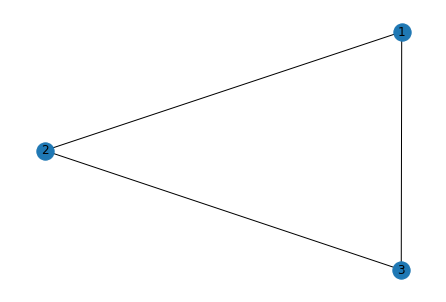

In [3]:
# ネットワーク生成
G = nx.Graph([(1, 2), (2, 3), (3, 1)])
# G = nx.Graph() # 空のグラフを作成する場合
nx.draw(G, with_labels=True,font_family='sans-serif') # ラベルをTrueにして番号の可視化

* 数字以外の日本語,文字の記述も設定を加えれば可能(defaultで文字化けする)

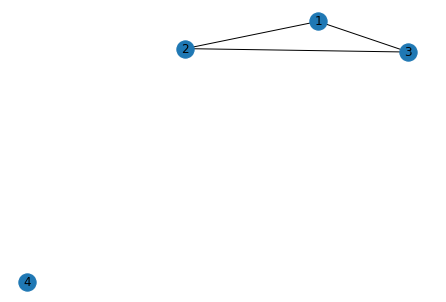

In [4]:
# ノードの追加
G.add_node(4) # 4は繋がってないので遠くに配置
nx.draw(G, with_labels=True)

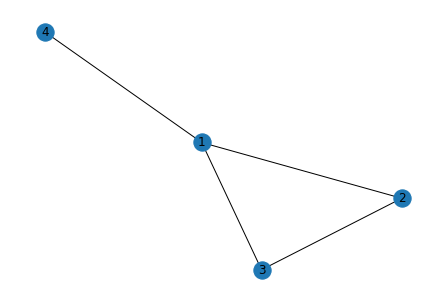

In [5]:
# リンクの追加
G.add_edge(1,4)
nx.draw(G, with_labels=True)

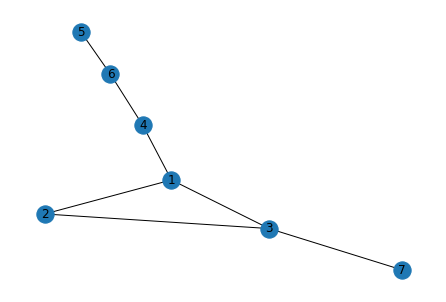

In [6]:
# 複数ノードの追加
n = [5, 6, 7]
G.add_nodes_from(n)

# 複数リンクの追加
e = [(5,6), (3,7), (4,6)]
G.add_edges_from(e)

nx.draw(G, with_labels=True)

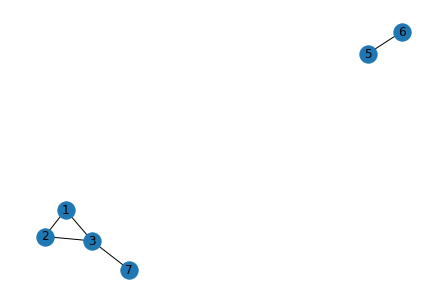

In [7]:
# ノードの削除
G.remove_node(4)
nx.draw(G, with_labels=True)

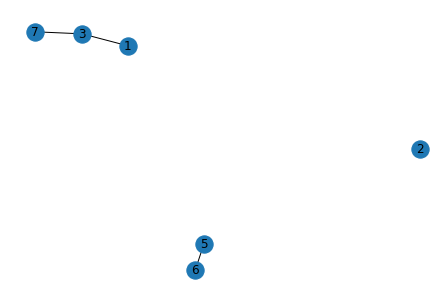

In [8]:
# 複数リンクの削除
G.remove_edges_from([(1,2), (2,3)])
nx.draw(G, with_labels=True)

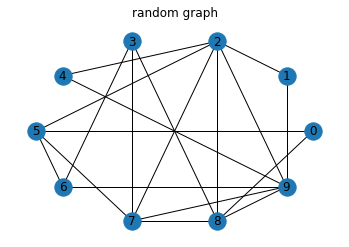

In [9]:
# ランダムグラフ生成 
rnd = nx.gnp_random_graph(10, 0.5) # (第1引数　ノードの数, 第２引数　エッジを引く確率(1で全て引く))

pos=nx.circular_layout(rnd) # 円周上に等間隔で配置
#pos = nx.spring_layout(rnd) # バネモデル(繋がり(バネ)が自然の長さ)
#pos = nx.random_layout(rnd) #ランダムなレイアウト

plt.title('random graph')
nx.draw(rnd, pos, with_labels=True)

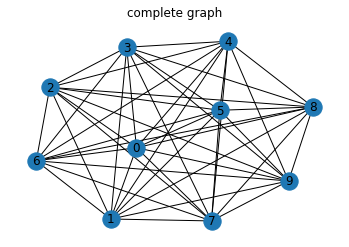

In [10]:
# 完全グラフ生成
K_10 = nx.complete_graph(10)
pos=nx.spring_layout(K_10)
plt.title('complete graph')
nx.draw(K_10, pos, with_labels=True)

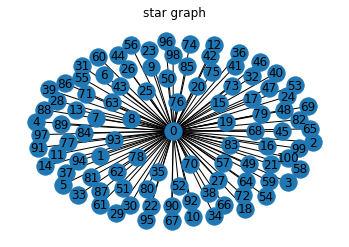

In [11]:
# スターグラフ生成
star = nx.star_graph(100)
pos=nx.spring_layout(star)
plt.title('star graph')
nx.draw(star, pos, with_labels=True)

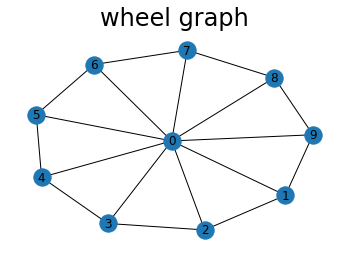

In [ ]:
# 車輪グラフ生成
wheel = nx.wheel_graph(10)
pos=nx.spring_layout(wheel)
plt.title('wheel graph')
nx.draw(wheel, pos, with_labels=True)

#### 密度とクラスタ係数

密度: どれだけネットワークが密集しているか    

密度を求める式
$$
  density = リンクの総数 / ノードのペアの総数 = \frac{m}{n(n-1) -2}
$$

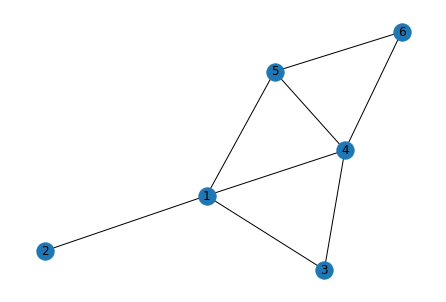

In [ ]:
%matplotlib inline
import networkx as nx # NetworkXをインポート
import matplotlib.pyplot as plt
import numpy as np

# ネットワーク生成
G = nx.Graph([(1, 2), (1,3), (1,4), (1,5), (3, 4), (4,5), (4,6),(5,6)])
nx.draw(G, with_labels=True) # ラベルをTrueにして番号の可視化

クラスタ係数 : 隣接ノード同士がどのくらい繋がっているか (数値化の数式は省略)

In [ ]:
# 密度を数値化する
print(nx.average_clustering(G))

0.5833333333333334


density: 0.044444444444444446 , clustering coefficient: 0.0


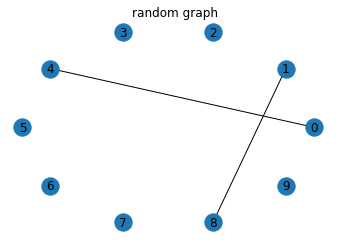

In [ ]:
%matplotlib inline
import networkx as nx # NetworkXをインポート
import matplotlib.pyplot as plt
import numpy as np

# ランダムグラフ生成
rnd = nx.gnp_random_graph(10, 0.1)
#pos=nx.spring_layout(rnd)
pos=nx.circular_layout(rnd)
#pos = nx.random_layout(rnd)
plt.title('random graph')
nx.draw(rnd, pos, with_labels=True)
print('density:', nx.density(rnd), ', clustering coefficient:', nx.average_clustering(rnd))

density: 0.2222222222222222 , clustering coefficient: 0.0


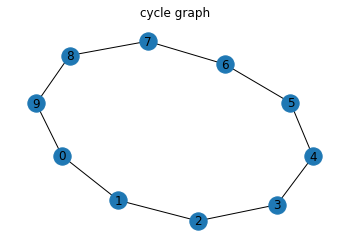

In [ ]:
# サイクルグラフ生成
cycle = nx.cycle_graph(10)
pos=nx.spring_layout(cycle)
#pos=nx.circular_layout(cycle)
#pos=nx.random_layout(cycle)
plt.title('cycle graph')
nx.draw(cycle, pos, with_labels=True)
print('density:', nx.density(cycle), ', clustering coefficient:', nx.average_clustering(cycle))

density: 1.0 , clustering coefficient: 1.0


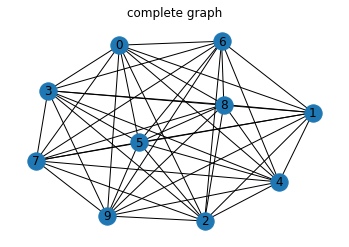

In [ ]:
# 完全グラフ生成
K_10 = nx.complete_graph(10)
pos=nx.spring_layout(K_10)
plt.title('complete graph')
nx.draw(K_10, pos, with_labels=True)
print('density:', nx.density(K_10), ', clustering coefficient:', nx.average_clustering(K_10))

#### スモールワールドネットワーク生成


経路長が長い& 高度にクラスタ化を兼ね備えたネットワーク

NetworkXのwatts_strogatz_graph()より生成
Graph with 100 nodes and 200 edges
クラスタ係数： 0.42566666666666664


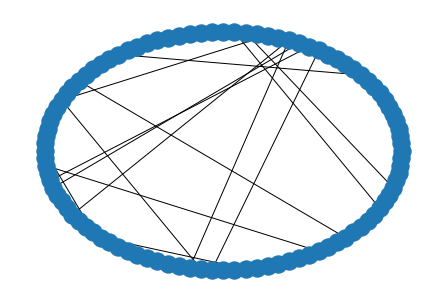

In [ ]:
n = 100 # ノード数
k = 4 # 次数
p = 0.1 # リンクつなぎ替え確率

print('NetworkXのwatts_strogatz_graph()より生成')
G1 = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G1)
print(nx.info(G1)) # 種々の情報を出力
print('クラスタ係数：', nx.average_clustering(G1)) # ネットワーク全体のクラスタ係数を出力
nx.draw(G1, pos)
plt.show()

In [ ]:
# スモールワールドネットワーク生成関数(自作した場合)
def gen_WS_network(n, k, p, seed=None):
    if seed is not None:
        np.random.seed(seed=seed)
    
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))
    
    for i in range(n):
        for j in range(k//2):
            G.add_edge(i, (i+j+1)%n) # k/2本リンクを張る
            
    for (u,v) in G.edges():
        if np.random.rand() < p: # pの確率でつなぎ替え
            G.remove_edge(u, v)
            new_node = (u+np.random.randint(n-1)+1)%n # 新しい接続先としてu+1からu-1までの中からランダムに選ぶ
            while G.has_edge(u, new_node) == True: # 既存リンクは除外
                new_node = (u+np.random.randint(n-1)+1)%n
            G.add_edge(u, new_node)
    
    return G

自作関数による生成
Graph with 100 nodes and 200 edges
クラスタ係数： 0.3556190476190476


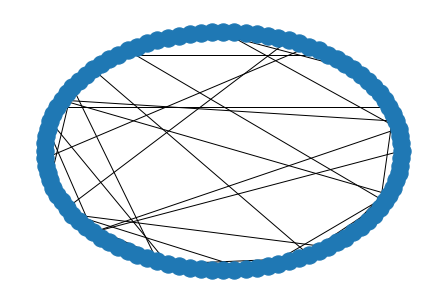

In [ ]:
n = 100
k = 4
p = 0.1

print('自作関数による生成')
G2 = gen_WS_network(n, k, p)
pos = nx.circular_layout(G2)
print(nx.info(G2))
print('クラスタ係数：', nx.average_clustering(G2))
nx.draw(G2, pos)
plt.show()

#### 次数と次数分布

次数: ノード(頂点)が持つリンク（辺)の数  
平均次数: 次数kの平均値  
次数分布: 次数が全ノードに占める割合: p(k) 棒グラフで表すことが多い

Graph with 5 nodes and 5 edges
[1, 2, 3, 4, 5]


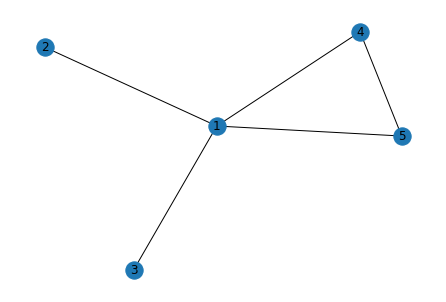

In [ ]:
# ネットワーク生成
G = nx.Graph([(1, 2), (1,3), (1,4), (1,5), (4,5)])
print(nx.info(G))
print(G.nodes())
nx.draw(G, with_labels=True) # ラベルをTrueにして番号の可視化

[0, 2, 2, 0, 1]


(0.0, 1.0)

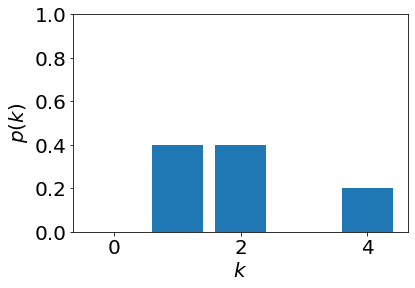

In [ ]:
print(nx.degree_histogram(G)) # 時数の個数を出力
degree_dist = [i/5 for i in nx.degree_histogram(G)]

plt.rcParams['font.size'] = 20
plt.bar(range(5), height = degree_dist) # 時数の割合ヒストグラムを出力
plt.xlabel('$k$')
plt.ylabel('$p(k)$')
plt.ylim(0,1)

#### スケールフリーネットワーク

多数が少数とつながり、少数が多数とつながっているスケールフリーネットワーク(BAモデルを使う)  
ex WWW, 俳優の共演関係  
時数分布はべき則となる  
参考: https://syodokukai.exblog.jp/20771928/

NetworkX.barabasi_albert_graph()
Graph with 100 nodes and 384 edges


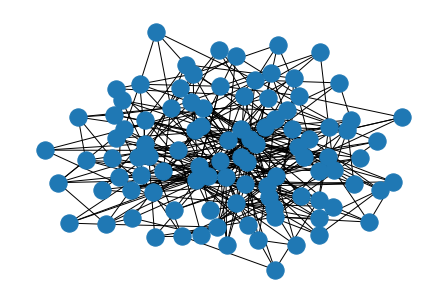

In [ ]:
# BAモデルによるスケールフリーネットワーク
n = 100
m = 4

print('NetworkX.barabasi_albert_graph()')
G1 = nx.barabasi_albert_graph(n, m)
print(nx.info(G1))
nx.draw(G1)
plt.show()

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 56, 57, 62, 63, 65, 67, 72, 73, 74, 75, 76, 77, 81, 85, 87, 93, 94, 96, 97, 102, 107, 114, 115, 120, 122, 128, 201, 248, 267]
[0.3324, 0.1938, 0.1154, 0.0776, 0.0542, 0.0396, 0.0308, 0.0254, 0.0188, 0.0152, 0.0118, 0.0106, 0.008, 0.007, 0.0056, 0.0048, 0.0052, 0.0034, 0.0038, 0.0024, 0.0028, 0.0014, 0.0018, 0.0012, 0.0022, 0.0016, 0.0018, 0.0012, 0.001, 0.0012, 0.0008, 0.0012, 0.0012, 0.0008, 0.0002, 0.001, 0.0006, 0.0012, 0.0002, 0.0004, 0.0006, 0.0004, 0.0004, 0.0002, 0.0004, 0.0006, 0.0004, 0.0004, 0.0004, 0.0002, 0.0002, 0.0002, 0.0004, 0.0002, 0.0002, 0.0004, 0.0004, 0.0002, 0.0002, 0.0004, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002]


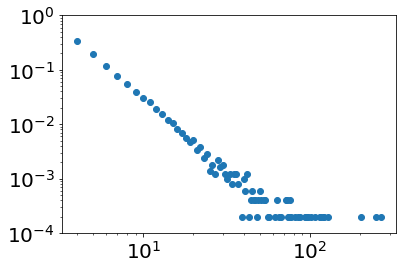

In [ ]:
# 時数分布のグラフ
n = 5000
m = 4

# スケールフリーネットワークの生成
G = nx.barabasi_albert_graph(n, m) # 組み込み関数で生成
# G = gen_BA_network(n, m) # 自作関数で生成

k = [i for i,x in enumerate(nx.degree_histogram(G)) if x != 0]
degree_dist = [i/n for i in nx.degree_histogram(G) if i != 0]
print(k)
print(degree_dist)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001,1)
plt.scatter(k, degree_dist)

#### 距離

* 距離: ノードペア間の最短経路の長さ
* 平均距離: 全ペアの距離の平均値
* 直径: 全ペアの距離の中で最大のもの

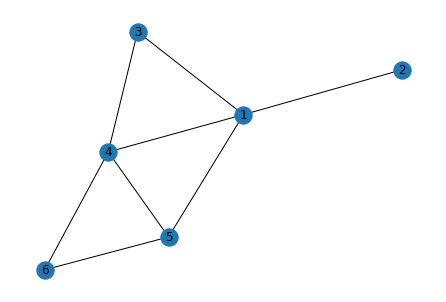

In [ ]:
# ネットワーク生成
G = nx.Graph([(1, 2), (1,3), (1,4), (1,5), (3, 4), (4,5), (4,6),(5,6)])
nx.draw(G, with_labels=True) # ラベルをTrueにして番号の可視化

In [ ]:
# （最短)距離の取得
print(nx.shortest_path_length(G, 1, 2))
print(nx.shortest_path_length(G, 3, 6))

1
2


In [ ]:
# 最短経路の取得
print(nx.shortest_path(G, 1, 2))
print(nx.shortest_path(G, 2, 6))
print([p for p in nx.all_shortest_paths(G, 2, 6)])

[1, 2]
[2, 1, 4, 6]
[[2, 1, 4, 6], [2, 1, 5, 6]]


In [ ]:
#　平均距離(L)と直径(D)
print('L=', nx.average_shortest_path_length(G))
print('D=', nx.diameter(G))

L= 1.5333333333333334
D= 3


#### 中心性(Centrality)

"中心"の指標
- 次数中心性: 次数(ノードが持つリンクの数)で決める / 正規化した値を算出 
- 近接中心性: 他の全て他の全てのノードへの距離(最短経路長)の平均値の逆数
- 他にも指標あり

活用: snsの中心性など

Degree Centrality {1: 0.8, 2: 0.2, 3: 0.4, 4: 0.8, 5: 0.6000000000000001, 6: 0.4}
Closeness Centrality {1: 0.8333333333333334, 2: 0.5, 3: 0.625, 4: 0.8333333333333334, 5: 0.7142857142857143, 6: 0.5555555555555556}


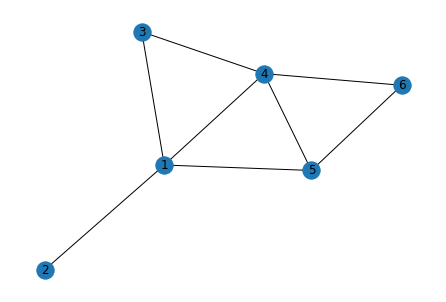

In [ ]:
# ネットワーク生成
G = nx.Graph([(1, 2), (1,3), (1,4), (1,5), (3, 4), (4,5), (4,6),(5,6)])
nx.draw(G, with_labels=True) # ラベルをTrueにして番号の可視化
print('Degree Centrality', nx.degree_centrality(G)) # 次数中心性
print('Closeness Centrality', nx.closeness_centrality(G)) # 近接中心性